In [77]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

1.11.0


In [78]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [79]:
len(train_data[0]), len(train_data[1])

(218, 189)

## IMDB data
* train and test data is index of word
* word dictionary is stored in word_index
* word dictionary is reversed  ( "word": windex )
* since data is index of word, encode data ( use dictionary ) is not necessary

## NOTE 
This notebook also compare Embeddings layer with trainable option

In [80]:
word_index = imdb.get_word_index()
word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 #unknow
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
vocaburary_size = len(reverse_word_index)
print("vocaburary size is ", vocaburary_size)

vocaburary size is  88588


In [81]:
def decode_review(text):
    return ' '.join([reverse_word_index[i] for i in text])
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sho

#### Add mote pad to data 

In [82]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                       value = word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, 
                                                       value = word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
print(len(train_data[0]), train_data[0])

256 [    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670 22665     9    35   480   284     5   150     4   172   112
   167 21631   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18 19193     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4 31050     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    13   104    88     4   38

In [83]:
print(train_labels[0:10])
from sklearn.model_selection import train_test_split
(train_data, val_data, train_labels, val_labels) = train_test_split(train_data, train_labels, test_size=0.1, random_state=99)
print(train_data.shape)
print(val_data.shape)

[1 0 0 1 0 0 1 0 1 0]
(22500, 256)
(2500, 256)


In [103]:
model = keras.Sequential()
# model.add(keras.layers.Embedding(vocaburary_size, 16, trainable=False))
model.add(keras.layers.Embedding(vocaburary_size, 128))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         11339264  
_________________________________________________________________
global_average_pooling1d_10  (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 11,347,585
Trainable params: 11,347,585
Non-trainable params: 0
_________________________________________________________________


### Use binary_crossentropy for binary classification

In [104]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [105]:
%%time
fit = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(val_data, val_labels))

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 12s 536us/step - loss: 0.6815 - acc: 0.6428 - val_loss: 0.6501 - val_acc: 0.7452
Epoch 2/20
22500/22500 [==============================] - 11s 506us/step - loss: 0.5661 - acc: 0.8007 - val_loss: 0.4681 - val_acc: 0.8352
Epoch 3/20
22500/22500 [==============================] - 11s 501us/step - loss: 0.3768 - acc: 0.8686 - val_loss: 0.3362 - val_acc: 0.8712
Epoch 4/20
22500/22500 [==============================] - 11s 501us/step - loss: 0.2615 - acc: 0.9107 - val_loss: 0.2919 - val_acc: 0.8836
Epoch 5/20
22500/22500 [==============================] - 11s 502us/step - loss: 0.1975 - acc: 0.9334 - val_loss: 0.2758 - val_acc: 0.8800
Epoch 6/20
22500/22500 [==============================] - 11s 501us/step - loss: 0.1526 - acc: 0.9525 - val_loss: 0.2711 - val_acc: 0.8892
Epoch 7/20
22500/22500 [==============================] - 11s 502us/step - loss: 0.1195 - acc: 0.9665 - val_loss: 0.2

In [106]:
import matplotlib.pyplot as plt
def plot_history_loss(fit, axL):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit, axR):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

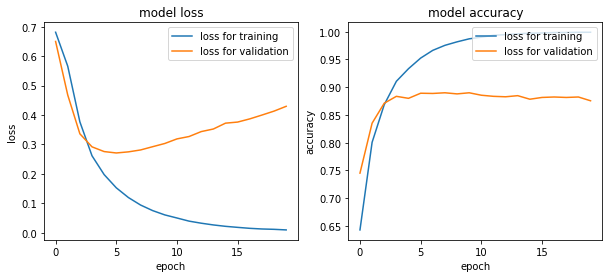

In [107]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit, axL)
plot_history_acc(fit, axR)

In [108]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocaburary_size, 128, trainable=False))
# model.add(keras.layers.Embedding(vocaburary_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 128)         11339264  
_________________________________________________________________
global_average_pooling1d_11  (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 11,347,585
Trainable params: 8,321
Non-trainable params: 11,339,264
_________________________________________________________________


In [109]:
%%time
fit = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(val_data, val_labels))

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 2s 84us/step - loss: 0.6929 - acc: 0.5066 - val_loss: 0.6925 - val_acc: 0.5500
Epoch 2/20
22500/22500 [==============================] - 1s 61us/step - loss: 0.6919 - acc: 0.5418 - val_loss: 0.6914 - val_acc: 0.5512
Epoch 3/20
22500/22500 [==============================] - 1s 60us/step - loss: 0.6907 - acc: 0.5632 - val_loss: 0.6900 - val_acc: 0.5848
Epoch 4/20
22500/22500 [==============================] - 1s 60us/step - loss: 0.6892 - acc: 0.5801 - val_loss: 0.6881 - val_acc: 0.6164
Epoch 5/20
22500/22500 [==============================] - 1s 60us/step - loss: 0.6873 - acc: 0.5961 - val_loss: 0.6862 - val_acc: 0.6020
Epoch 6/20
22500/22500 [==============================] - 1s 61us/step - loss: 0.6850 - acc: 0.6120 - val_loss: 0.6836 - val_acc: 0.6164
Epoch 7/20
22500/22500 [==============================] - 1s 61us/step - loss: 0.6822 - acc: 0.6074 - val_loss: 0.6803 - val_acc:

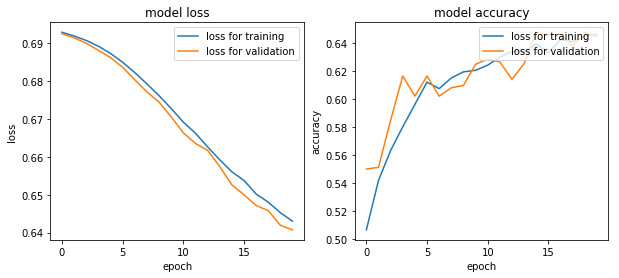

In [110]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit, axL)
plot_history_acc(fit, axR)

In [120]:
model = keras.Sequential()
# model.add(keras.layers.Embedding(vocaburary_size, 16, trainable=False))
model.add(keras.layers.Embedding(vocaburary_size, 128))
model.add(keras.layers.GlobalAveragePooling1D())
# model.add(keras.layers.Dense(128, activation=tf.nn.relu, bias_regularizer=tf.keras.regularizers.l2(0.01), use_bias=True))
model.add(keras.layers.Dense(64, activation=tf.nn.relu, bias_regularizer=tf.keras.regularizers.l2(1), use_bias=True))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
# model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])


In [121]:
%%time
fit = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(val_data, val_labels))

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 12s 550us/step - loss: 0.6859 - acc: 0.5876 - val_loss: 0.6661 - val_acc: 0.7448
Epoch 2/20
22500/22500 [==============================] - 11s 500us/step - loss: 0.6034 - acc: 0.7810 - val_loss: 0.5158 - val_acc: 0.8144
Epoch 3/20
22500/22500 [==============================] - 11s 496us/step - loss: 0.4152 - acc: 0.8598 - val_loss: 0.3549 - val_acc: 0.8664
Epoch 4/20
22500/22500 [==============================] - 11s 495us/step - loss: 0.2841 - acc: 0.9014 - val_loss: 0.2988 - val_acc: 0.8748
Epoch 5/20
22500/22500 [==============================] - 11s 496us/step - loss: 0.2144 - acc: 0.9269 - val_loss: 0.2914 - val_acc: 0.8764
Epoch 6/20
22500/22500 [==============================] - 11s 498us/step - loss: 0.1683 - acc: 0.9464 - val_loss: 0.2754 - val_acc: 0.8804
Epoch 7/20
22500/22500 [==============================] - 11s 496us/step - loss: 0.1332 - acc: 0.9604 - val_loss: 0.2

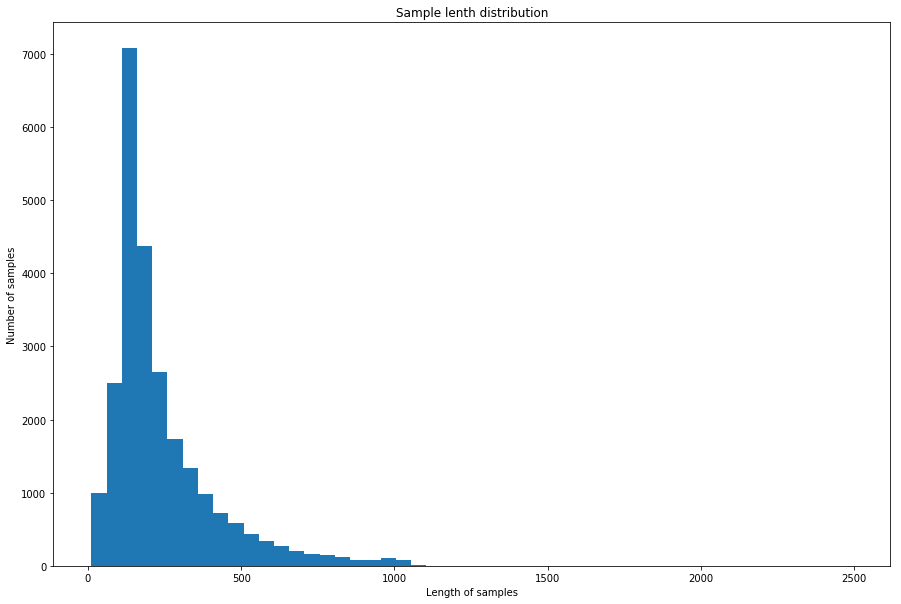

In [122]:
# size_of_sample = 10
# rand_samples_to_check=np.random.randint(len(train_data), size=size_of_sample)
(x_train, y_train), (x_test, y_test) = imdb.load_data()
plt.figure(figsize=(15,10))
plt.hist([len(sample) for sample in x_train], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample lenth distribution')
plt.show()